<a href="https://colab.research.google.com/github/MuralidharB/tft-stocks/blob/master/close_open.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Small python script that plots the difference between close and open prices of s&p stocks

In [ ]:
# Installation
!pip install -q yfinance
!pip install -q yahoo_fin --upgrade


In [ ]:
import random

## Hyper parameters
history = "10y"
buy_trigger = 3                           # times standard deviation
sell_trigger = 1                          # times the avg cost of the security to grow before we sell
security_age = 15                         # number of days to hold the security before we cut the losses
lockin_gains_factor = 1000                # times the orignal amount to grow before we lockin the gains.
mean_type = "+ve"                         # only consider stocks with +ve mean of ND. These stocks have been growing over the period of time
max_stocks_to_buy = 5                     # number of stocks to buy at buy trigger. We can change this value to be more adaptive based on market cap of the security and other parameters.
backtest_iterations = 25                  # number of backtests to run
backtest_days = random.sample(range(500, 700), backtest_iterations) # starting days for back testing
backtest_days.sort()
prefer_beta = True
above_beta_mean = False

starting_balance = 10000                  # seed money to start investing
current_account = original_balance = starting_balance
portfolio = {}

# Display test results. Debugging Tools
print_final_portfolio = False             # Prints the portfolio list at the end of each backtest iteration
plot_every_test_graph = True              # Prints the model performance during the back end against s&P500
plot_summary_graph = True                 # prints the summary graph
dump_all_trades = False                   # dumps all sells at the end of the trade. Use it sparingly, with iteration set to 1

# Deploy the initial amount gradually
tranche_pct = 25                          # of amount to deploy
tranche_period = 7                        # calender days between deployment


In [ ]:
tests = [
    {
        "Name": "Test 1",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 15,
        "lockin_gains_factor": 1000,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
     {
        "Name": "Test 2",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 15,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
     {
        "Name": "Test 3",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 1000,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
     {
        "Name": "Test 4",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 1000,
        "lockin_gains_factor": 1.1,
        "prefer_beta": False,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
     {
        "Name": "Test 5",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 90,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
     {
        "Name": "Test 6",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 90,
        "lockin_gains_factor": 1.1,
        "prefer_beta": False,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
    {
        "Name": "Test 7",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 90,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True,
        "mean_type": "",
        "above_beta_mean": False,
     },
     {
        "Name": "Test 8",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 90,
        "lockin_gains_factor": 1000,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
      {
        "Name": "Test 9",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 20,
        "lockin_gains_factor": 1000,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": True,
     },
     {
        "Name": "Test 10",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 20,
        "lockin_gains_factor": 1000,
        "prefer_beta": True,
        "mean_type": "+ve",
        "above_beta_mean": False,
     },
]

tests_to_run = [8, 10]

In [ ]:
import yfinance as yahooFinance
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import numpy as np
import pprint

pp = pprint.PrettyPrinter(indent=4)

stocks = si.tickers_sp500()
indices = ['^IXIC', '^GSPC', '^DJI']
stocks_ts = pd.DataFrame()
stocks_spread = pd.DataFrame()
indices_ts = pd.DataFrame()

for idx in indices:
    data = yahooFinance.Ticker(idx).history(period=history)
    d = data.copy()[['Open', 'Close']]
    indices_ts[idx+"_Open"] = d['Open']
    indices_ts[idx+"_Close"] = d['Close']

betas = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/betas.csv")
betas = betas.drop(['index', 'Attribute', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)
betas = betas.rename(columns={"Recent": "Beta"})
betas = betas.set_index('Ticker')

for stock in stocks:
    data = yahooFinance.Ticker(stock).history(period=history)
    d = data.copy()[['Open', 'Close']]
    stocks_ts[stock+"_Open"] = d['Open']
    stocks_ts[stock+"_Close"] = d['Close']
    stocks_spread[stock] = (d['Close'] - d['Open']) * 100/d['Open']

    stocks_ts = stocks_ts.copy()
    stocks_spread = stocks_spread.copy()


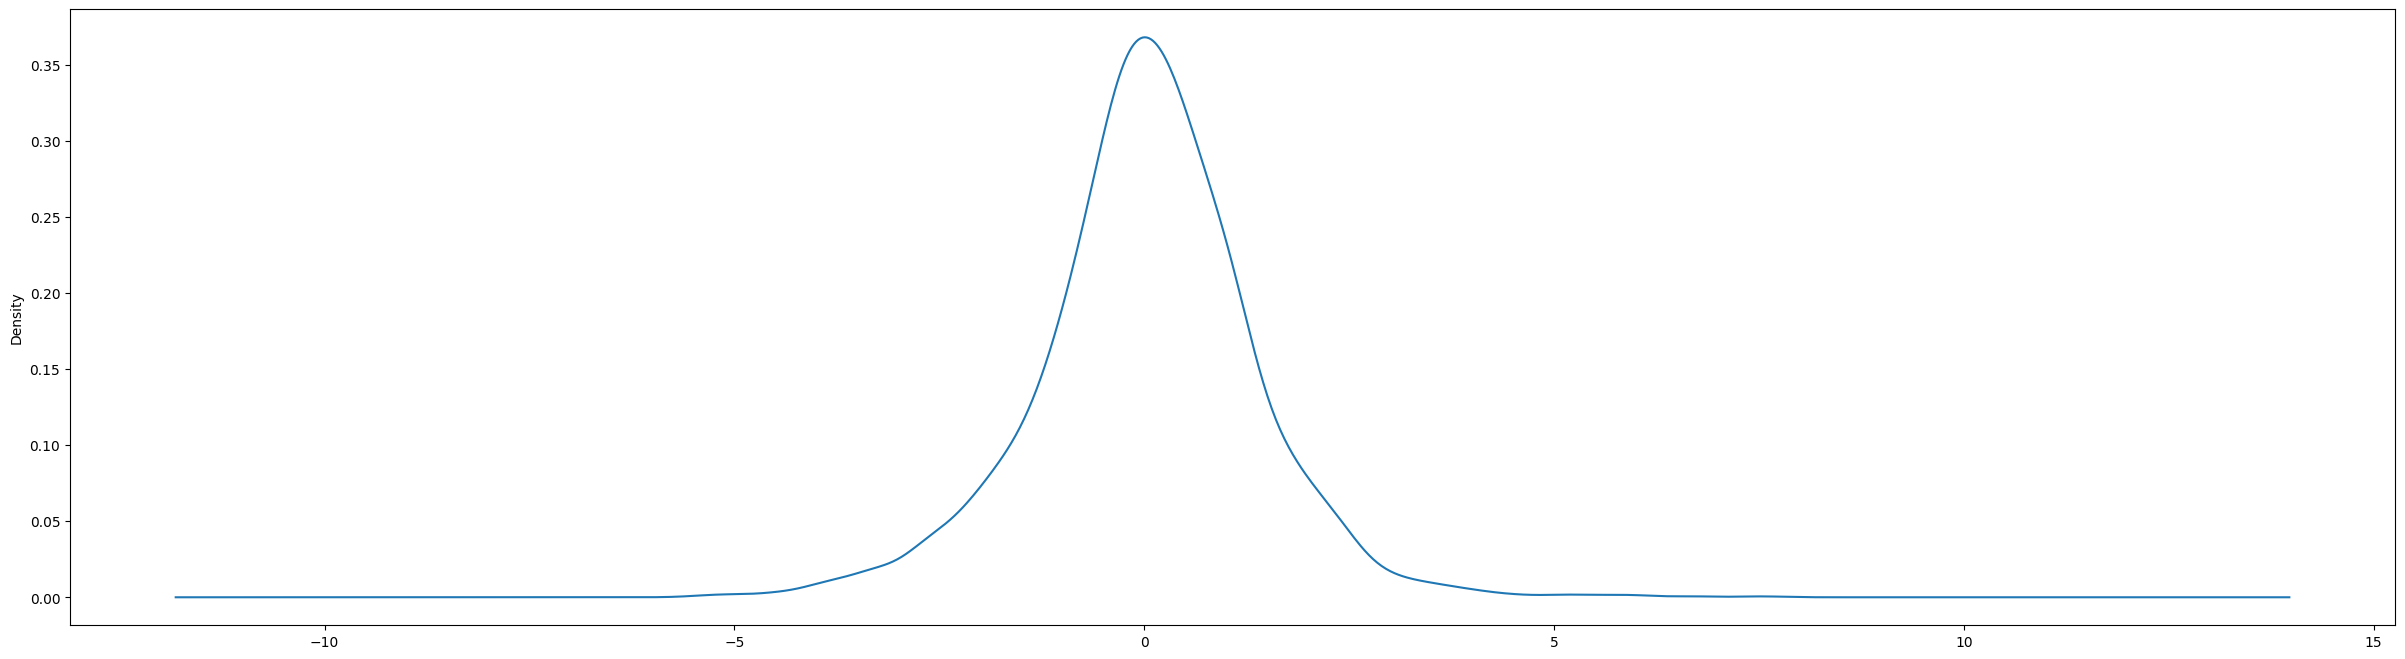

In [ ]:

for stock in stocks[:1]:
    #latest[stock] = data.iloc[-1]['Close'] - data.iloc[-1]['Open']

    fig = go.Figure(data=[go.Candlestick(x=d.index,
                open=d['Open'],
                high=d['Open'],
                low=d['Close'],
                close=d['Close'])])
    fig.update_layout(
      title=stock,
      yaxis_title=stock +' Stock',
      shapes = [dict(
          x0='2022-12-09', x1='2022-12-09', y0=0, y1=1, xref='x', yref='paper',
          line_width=2)],
      annotations=[dict(
          x='2022-12-09', y=0.05, xref='x', yref='paper',
          showarrow=False, xanchor='left', text='Increase Period Begins')]
    )

    fig.show()

    stocks_spread['Date'] = stocks_spread.index
    fig = px.line(stocks_spread, x="Date", y=stock, title="Stocks Daily Price change", markers=True) 
    fig.show()

    x = pd.Series(stocks_spread[stock])
    ax = x.plot.kde(figsize=(30,8))
    #sns.set(rc={'figure.figsize':(25.7,8.27)})
    #sns.lineplot(x="Date",y=stock, data=stocks_spread, markers=True, err_style="bars")
    #sns.despine();

In [ ]:
#print(stocks_spread.describe())
std = stocks_spread.describe().loc['std']
mean = stocks_spread.describe().loc['mean']
std = pd.DataFrame.from_dict(std)
std.columns = ['std',]
betas_mean = betas.describe()['Beta']['mean']

mean = pd.DataFrame.from_dict(mean)
mean.columns = ['mean',]

fig = px.line(std, title="Daily Stock Price change", markers=True)
fig.show()
fig = px.line(betas, title="Stocks Betas", markers=True)
fig.show()


In [ ]:
# Determine what stocks are in buy zone and what stocks are in sell zone
# Start date of the investing

def getsellbuy(index, portfolio, security_profit, security_loss):
  latest = {}
  for s in stocks:
      latest[s] = (stocks_ts.loc[index][s+"_Close"] - stocks_ts.loc[index][s+"_Open"])* 100 /stocks_ts.loc[index][s+"_Open"]

  latest = pd.Series(latest)
  pd.DataFrame.from_dict(latest)
  latest_diff = pd.DataFrame.from_dict(latest)
  latest_diff.columns = ['diff',]
  #latest_diff = latest_diff.iloc[::-1]

  latest_diff['std'] = std['std']

  # Find stocks that are in buy range
  latest_diff['buy'] = np.where(((mean_type != "+ve" or mean['mean'] > 0) & (latest_diff['diff'] < 0) &
                                 (above_beta_mean == False or betas_mean >= betas['Beta']) &
                                 (latest_diff['diff'] < -buy_trigger * std['std'])), True, False)
  latest_diff['beta'] = betas['Beta']

  # Find stocks that are in sell range
  latest_diff['sell'] = False #np.where((latest_diff['diff'] >= std['std']), True, False)
  profit = loss = 0
  for s in stocks:
    if s in portfolio:
      t = index - portfolio[s]['date']
      avg = sum(portfolio[s]['costs'])/len(portfolio[s]['costs'])
      if avg + sell_trigger * std['std'][s] * avg / 100 <= stocks_ts.loc[index, s+"_Close"]:
        # If the avg cost of the security has grown more than std
        #print(s, avg, portfolio[s]['costs'], std['std'][s+"_Diff"], stocks_ts.loc[index, s+"_Close"])
        profit = len(portfolio[s]['costs']) * stocks_ts.loc[index, s+"_Close"] - sum(portfolio[s]['costs'])
        if dump_all_trades:
          print("Selling %s (beta %f) at profit. closing price %f. profit %f days %d" %
                (s, betas['Beta'][s], stocks_ts.loc[index, s+"_Close"], profit, t.days), portfolio[s])
        security_profit.loc[len(security_profit.index)] = {'beta':betas['Beta'][s], 'days':t.days, 'profit':profit}
        latest_diff.at[s, 'sell'] = True
      elif t.days > security_age:
        # if the security has aged for certain days, cut the losses
        loss = len(portfolio[s]['costs']) * stocks_ts.loc[index, s+"_Close"] - sum(portfolio[s]['costs'])
        if dump_all_trades:
          print("Dumping %s(beta %f) because of age. closing price %f. loss %f" %
                (s, betas['Beta'][s], stocks_ts.loc[index, s+"_Close"], loss),
                portfolio[s])
        security_loss.loc[len(security_loss.index)] = {'beta':betas['Beta'][s], 'loss':loss}
        latest_diff.at[s, 'sell'] = True
  
  # Print which stocks are buy and which are sell
  #print("Stock to Buy on " + str(index))
  #print(latest_diff[latest_diff['buy']])
  #print()
  #print("Stocks to Sell on " + str(index))
  #print(latest_diff[latest_diff['sell']])
  sell_stocks = latest_diff[latest_diff['sell']]
  buy_stocks = latest_diff[latest_diff['buy']]
  if prefer_beta:
    buy_stocks = buy_stocks.sort_values('beta',ascending=False)
  return sell_stocks, buy_stocks


In [ ]:
# We assume that we invest $100 in each stock that is in the buy zone
# and sell all stocks in the sell zone

# We will start back testing from year back. We can always change the starting point and tune the model.

def calculate_networth(backtest_start_date):
  networth = current_account
  for stock, value in portfolio.items():
    networth += value['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
  return networth

def do_one_backtesting(tradingdays_togoback):
  global portfolio
  global original_balance
  global current_account

  stocks_bought = pd.DataFrame(columns=stocks)
  stocks_sold = pd.DataFrame(columns=stocks)
  stocks_profit = pd.DataFrame(columns=['beta', 'days', 'profit'])
  stocks_loss = pd.DataFrame(columns=['beta', 'loss'])

  original_balance = starting_balance
  current_account = 0
  portfolio = {}
  capital_to_be_deployed = original_balance

  idx = int(len(stocks_ts.index)- tradingdays_togoback)
  price_movement = []
  cash_inhand = []
  for backtest_start_date in stocks_ts.index[idx:]:
      t = backtest_start_date - stocks_ts.index[idx]
      if (capital_to_be_deployed > 0) & (t.days % tranche_period == 0):
        current_account += min(tranche_pct * starting_balance / 100, capital_to_be_deployed)
        capital_to_be_deployed -= min(tranche_pct * starting_balance / 100, capital_to_be_deployed)
        #print("Day of deployment %d, current_account %d, deployed_capital %d" % (t.days, current_account, capital_to_be_deployed))
      sell, buy = getsellbuy(backtest_start_date, portfolio, stocks_profit, stocks_loss)

      # process the stocks that are marked sell
      for st in sell.iterrows():
        stock = st[0].split('_')[0]
        if stock in portfolio:
          current_account += portfolio[stock]['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          stocks_sold.loc[backtest_start_date, stock] = portfolio[stock]['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          portfolio.pop(stock)
      
      # buy stocks that are marked by. We are buying max_stocks_to_buy number of stocks
      # TODO: The number of stocks to be must be adaptive. Will come up with some
      # algorithm based on:
      # 1. Market capitalization
      # 2. Beta
      # and other criteria
      # The goal is to put the money to work
      for st in buy.iterrows():
        stock = st[0].split('_')[0]
        if current_account > max_stocks_to_buy * stocks_ts.loc[backtest_start_date][stock+"_Close"]:
          current_account -= max_stocks_to_buy * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          if not stock in portfolio:
              assert portfolio.get(stock, None) == None
              portfolio[stock] = {'shares': 0, 'costs':[], 'date': backtest_start_date}
          portfolio[stock]['shares'] += max_stocks_to_buy
          stocks_bought.loc[backtest_start_date, stock] = max_stocks_to_buy * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          for i in range(max_stocks_to_buy):
            portfolio[stock]['costs'].append(stocks_ts.loc[backtest_start_date][stock+"_Close"])

      # lock in the gains after 10% increase of networth
      nw = calculate_networth(backtest_start_date)
      price_movement.append(nw)
      cash_inhand.append(current_account)
      if nw > original_balance * lockin_gains_factor:
          #print(backtest_start_date, calculate_networth(backtest_start_date), current_account, portfolio)
          for stock, value in portfolio.items():
            current_account += value['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
            stocks_sold.loc[backtest_start_date, stock] = stocks_ts.loc[backtest_start_date][stock+"_Close"]
          portfolio = {}
          original_balance = current_account
          #print(current_account, portfolio)
      #print(current_account, portfolio)

  if dump_all_trades:
    print(stocks_profit)
    print(stocks_loss)
  print("Profit Distribution")
  print("===================")
  print(stocks_profit.describe())
  print()
  print("Loss Distribution")
  print("=================")
  print(stocks_loss.describe())
  print("Total Profit %f and Total Loss %f" % (stocks_profit['profit'].sum(), stocks_loss['loss'].sum()))
  #stocks_sold.to_csv("/content/drive/MyDrive/Colab Notebooks/sold.csv")
  #stocks_bought.to_csv("/content/drive/MyDrive/Colab Notebooks/bought.csv")
  return calculate_networth(backtest_start_date), current_account, price_movement, cash_inhand

In [ ]:

def run_backtest():
  nws = {}
  sp_ret = {}
  for i in backtest_days:
    tradingdays_togoback = i
    networth, current, pm, cih = do_one_backtesting(tradingdays_togoback)
    # normalize s&p500 for starting balance
    idx_list = list(indices_ts.loc[indices_ts.index[-tradingdays_togoback:], "^GSPC_Close"] * starting_balance/indices_ts.loc[indices_ts.index[-tradingdays_togoback], "^GSPC_Close"])
    pm_pct = (pm[-1]-starting_balance)*100/starting_balance
    d = pd.DataFrame({'Portfolio_Performance':pm,'SP_Performance':idx_list, "Cash_In_Hand": cih})
    d.index = indices_ts.index[-tradingdays_togoback:]
    idx_pct = (idx_list[-1] - idx_list[0])*100/idx_list[0]
    print("Total networth: %d (Cash %d) after going back %d days (%s)" % (networth, current_account, tradingdays_togoback, stocks_ts.index[-tradingdays_togoback]))
    print("Model (%f)%% vs S&P Performance (%f)%%" % (pm_pct, idx_pct))
    if print_final_portfolio:
      pp.pprint(portfolio)
    nws[i] = networth
    sp_ret[i] = idx_list[-1]
    if plot_every_test_graph:
      fig = px.line(d, title="Model (%f)%% vs S&P Performance (%f)%% starting at %s" % (pm_pct, idx_pct, stocks_ts.index[-tradingdays_togoback]), markers=True)
      fig.show()

  if plot_summary_graph:
    plt.bar(nws.keys(), nws.values(), color="green", label='Model')
    plt.bar(sp_ret.keys(), sp_ret.values(), color="blue", label='S&P 500')
    plt.title("Networth at the end of each iteration")
    plt.xlabel('Days') 
    plt.ylabel('Networth')
    plt.legend()
    plt.show()
    print(sum(nws.values())/len(nws))
    idx_list = []
    for i in backtest_days:
      idx_list.append(indices_ts.index[-i])
    summary = pd.DataFrame(data={"Model":nws.values(), "S&P":sp_ret.values()}, 
                           index=list(idx_list))
    fig = px.bar(summary, title="Model vs S&P Backtesting Results. Seed money $%f" % starting_balance, barmode="group")
    fig.show()
    

Test Parameters for Test 8
{   'Name': 'Test 8',
    'above_beta_mean': False,
    'buy_trigger': 2,
    'lockin_gains_factor': 1000,
    'mean_type': '+ve',
    'prefer_beta': True,
    'security_age': 90,
    'sell_trigger': 1}
Profit Distribution
             beta        days      profit
count  529.000000  529.000000  529.000000
mean     1.168620   12.888469   17.189062
std      0.437529   18.525291   21.832358
min      0.000000    1.000000    0.593481
25%      0.850000    2.000000    6.075535
50%      1.150000    5.000000   11.701088
75%      1.470000   14.000000   19.851570
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  47.000000   47.000000
mean    1.115957 -104.121000
std     0.410676  106.236802
min     0.270000 -495.849915
25%     0.955000 -140.818558
50%     1.090000  -72.850533
75%     1.325000  -33.610601
max     2.490000   -3.849945
Total Profit 9093.013878 and Total Loss -4893.687000
Total networth: 13340 (Cash 398) after 

Profit Distribution
             beta        days      profit
count  522.000000  522.000000  522.000000
mean     1.184061   12.852490   17.008642
std      0.439392   18.234853   20.223849
min      0.000000    1.000000    0.528097
25%      0.882500    2.000000    6.012487
50%      1.170000    5.000000   11.646194
75%      1.500000   14.000000   20.087490
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  49.000000   49.000000
mean    1.119388 -106.083468
std     0.417584  116.288813
min     0.270000 -495.849915
25%     0.930000 -142.950020
50%     1.120000  -72.850533
75%     1.320000  -27.549992
max     2.490000   -1.058807
Total Profit 8878.511214 and Total Loss -5198.089952
Total networth: 12869 (Cash 363) after going back 503 days (2021-04-09 00:00:00-04:00)
Model (28.695812)% vs S&P Performance (-0.575949)%


Profit Distribution
             beta        days      profit
count  552.000000  552.000000  552.000000
mean     1.175254   12.391304   17.416957
std      0.435578   18.765700   20.031301
min      0.000000    1.000000    0.528097
25%      0.867500    2.000000    6.199989
50%      1.150000    4.000000   11.984949
75%      1.460000   13.000000   20.912495
max      2.880000   91.000000  252.683411

Loss Distribution
           beta        loss
count  47.00000   47.000000
mean    1.15234 -122.288142
std     0.41170  143.663652
min     0.27000 -741.340942
25%     0.95000 -153.937511
50%     1.12000  -79.850006
75%     1.33500  -33.610601
max     2.49000   -3.578367
Total Profit 9614.160075 and Total Loss -5747.542677
Total networth: 13002 (Cash 716) after going back 508 days (2021-04-01 00:00:00-04:00)
Model (30.022999)% vs S&P Performance (2.118225)%


Profit Distribution
             beta        days      profit
count  551.000000  551.000000  551.000000
mean     1.176679   12.459165   17.941983
std      0.431958   18.492300   21.507926
min      0.000000    1.000000    0.528097
25%      0.875000    2.000000    6.062765
50%      1.150000    5.000000   11.759186
75%      1.465000   13.000000   20.737228
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  49.000000   49.000000
mean    1.097959  -98.703785
std     0.397827  110.413062
min     0.270000 -495.849915
25%     0.940000 -124.102097
50%     1.080000  -67.051315
75%     1.290000  -27.615776
max     2.490000   -1.058807
Total Profit 9886.032405 and Total Loss -4836.485457
Total networth: 14279 (Cash 774) after going back 511 days (2021-03-29 00:00:00-04:00)
Model (42.792129)% vs S&P Performance (3.372624)%


Profit Distribution
             beta        days      profit
count  520.000000  520.000000  520.000000
mean     1.165692   13.450000   17.323743
std      0.451345   19.581395   20.572787
min      0.000000    1.000000    0.593481
25%      0.850000    2.000000    5.952334
50%      1.150000    5.000000   11.114697
75%      1.480000   16.000000   19.519291
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  57.000000   57.000000
mean    1.170877  -98.984154
std     0.432234  138.822377
min     0.000000 -873.117828
25%     0.960000 -124.102097
50%     1.190000  -51.966877
75%     1.420000  -17.219152
max     2.490000   -1.058807
Total Profit 9008.346334 and Total Loss -5642.096791
Total networth: 12624 (Cash 442) after going back 516 days (2021-03-22 00:00:00-04:00)
Model (26.240701)% vs S&P Performance (4.172724)%


Profit Distribution
             beta        days      profit
count  626.000000  626.000000  626.000000
mean     1.175176   11.621406   18.186163
std      0.437175   17.019014   22.896244
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    6.397619
50%      1.175000    5.000000   11.900005
75%      1.480000   13.000000   21.173248
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  53.000000   53.000000
mean    1.151132 -115.835515
std     0.377291  153.735908
min     0.270000 -792.204208
25%     0.950000 -124.749966
50%     1.120000  -70.465927
75%     1.330000  -27.615776
max     2.490000   -1.058807
Total Profit 11384.537997 and Total Loss -6139.282293
Total networth: 14196 (Cash 383) after going back 526 days (2021-03-08 00:00:00-05:00)
Model (41.967327)% vs S&P Performance (7.423291)%


Profit Distribution
             beta        days      profit
count  629.000000  629.000000  629.000000
mean     1.173196   11.551669   17.021644
std      0.432607   16.944814   20.796286
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    6.161270
50%      1.160000    5.000000   11.561584
75%      1.480000   13.000000   20.365677
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  54.000000   54.000000
mean    1.168333 -114.768399
std     0.388027  138.370151
min     0.270000 -741.340942
25%     0.960000 -133.140330
50%     1.100000  -78.437748
75%     1.337500  -27.986832
max     2.490000   -1.058807
Total Profit 10706.614079 and Total Loss -6197.493558
Total networth: 13711 (Cash 140) after going back 540 days (2021-02-16 00:00:00-05:00)
Model (37.119105)% vs S&P Performance (4.384640)%


Profit Distribution
             beta        days      profit
count  734.000000  734.000000  734.000000
mean     1.176185   12.008174   18.755174
std      0.434782   17.444981   25.132773
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    6.186829
50%      1.165000    5.000000   11.959944
75%      1.480000   13.000000   21.929989
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  57.000000   57.000000
mean    1.192807 -111.073583
std     0.418517  134.913689
min     0.270000 -640.771790
25%     0.950000 -135.937119
50%     1.120000  -67.982330
75%     1.450000  -27.615776
max     2.490000   -1.058807
Total Profit 13766.297555 and Total Loss -6331.194234
Total networth: 16686 (Cash 698) after going back 543 days (2021-02-10 00:00:00-05:00)
Model (66.860839)% vs S&P Performance (4.990950)%


Profit Distribution
             beta        days      profit
count  692.000000  692.000000  692.000000
mean     1.177775   12.176301   18.172234
std      0.451362   17.774862   22.480949
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    6.274943
50%      1.130000    5.000000   12.080231
75%      1.482500   13.000000   21.974745
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  58.000000   58.000000
mean    1.162931 -114.515008
std     0.418183  148.080396
min     0.270000 -792.204208
25%     0.950000 -133.140330
50%     1.120000  -75.651493
75%     1.412500  -28.629627
max     2.490000   -1.058807
Total Profit 12575.185905 and Total Loss -6641.870437
Total networth: 15161 (Cash 718) after going back 548 days (2021-02-03 00:00:00-05:00)
Model (51.614104)% vs S&P Performance (7.175924)%


Profit Distribution
             beta        days      profit
count  629.000000  629.000000  629.000000
mean     1.183434   12.050874   17.444018
std      0.430018   17.571980   22.042975
min      0.000000    1.000000    0.593486
25%      0.860000    2.000000    6.279736
50%      1.180000    5.000000   11.701088
75%      1.480000   13.000000   21.054230
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  60.000000   60.000000
mean    1.164333 -113.894453
std     0.413769  150.846413
min     0.180000 -792.204208
25%     0.960000 -133.171825
50%     1.120000  -72.491169
75%     1.347500  -27.599330
max     2.490000   -1.058807
Total Profit 10972.287560 and Total Loss -6833.667188
Total networth: 13269 (Cash 110) after going back 561 days (2021-01-14 00:00:00-05:00)
Model (32.696946)% vs S&P Performance (8.153780)%


Profit Distribution
             beta        days      profit
count  663.000000  663.000000  663.000000
mean     1.177647   11.672700   17.382206
std      0.448433   17.228427   25.426595
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    5.531063
50%      1.170000    5.000000   11.164331
75%      1.485000   13.000000   20.385113
max      2.880000   91.000000  381.750031

Loss Distribution
            beta        loss
count  59.000000   59.000000
mean    1.126610 -120.259679
std     0.387559  169.071855
min     0.270000 -792.204208
25%     0.950000 -124.426031
50%     1.120000  -67.051315
75%     1.335000  -25.385180
max     2.490000   -1.058807
Total Profit 11524.402747 and Total Loss -7095.321059
Total networth: 13549 (Cash 745) after going back 567 days (2021-01-06 00:00:00-05:00)
Model (35.491703)% vs S&P Performance (9.521526)%


Profit Distribution
             beta        days      profit
count  763.000000  763.000000  763.000000
mean     1.180393   12.120577   17.752949
std      0.446733   17.573203   21.904526
min      0.000000    1.000000    0.528097
25%      0.860000    2.000000    6.187382
50%      1.160000    5.000000   11.800003
75%      1.495000   13.000000   20.952110
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  59.000000   59.000000
mean    1.104237 -105.001265
std     0.397905  122.400563
min     0.270000 -495.849915
25%     0.925000 -123.807392
50%     1.080000  -59.605408
75%     1.325000  -22.946177
max     2.490000   -1.058807
Total Profit 13545.500240 and Total Loss -6195.074630
Total networth: 16487 (Cash 792) after going back 578 days (2020-12-18 00:00:00-05:00)
Model (64.871867)% vs S&P Performance (10.665042)%


Profit Distribution
            beta        days      profit
count  683.00000  683.000000  683.000000
mean     1.16511   11.853587   17.775201
std      0.44266   17.543300   21.057144
min      0.00000    1.000000    0.593481
25%      0.85000    2.000000    6.151752
50%      1.15000    5.000000   11.949997
75%      1.46000   13.000000   22.291756
max      2.88000   91.000000  252.683411

Loss Distribution
            beta        loss
count  62.000000   62.000000
mean    1.124194 -106.726003
std     0.412635  151.976909
min     0.270000 -873.117828
25%     0.875000 -110.423260
50%     1.115000  -54.000559
75%     1.340000  -15.003726
max     2.490000    4.596863
Total Profit 12140.462017 and Total Loss -6617.012191
Total networth: 14512 (Cash 754) after going back 579 days (2020-12-17 00:00:00-05:00)
Model (45.123403)% vs S&P Performance (10.276483)%


Profit Distribution
             beta        days      profit
count  734.000000  734.000000  734.000000
mean     1.167725   12.431880   17.623412
std      0.432999   17.573082   22.249663
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    5.696161
50%      1.160000    5.000000   10.350971
75%      1.460000   14.000000   20.163155
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  64.000000   64.000000
mean    1.127969 -101.776471
std     0.415124  125.297427
min     0.180000 -741.340942
25%     0.927500 -133.171825
50%     1.100000  -64.891796
75%     1.345000  -27.599330
max     2.490000   -1.058807
Total Profit 12935.584364 and Total Loss -6513.694139
Total networth: 15551 (Cash 859) after going back 589 days (2020-12-03 00:00:00-05:00)
Model (55.511224)% vs S&P Performance (11.953464)%


Profit Distribution
             beta        days      profit
count  804.000000  804.000000  804.000000
mean     1.178358   11.588308   17.553578
std      0.433166   16.579133   20.061518
min      0.000000    1.000000    0.528097
25%      0.860000    2.000000    6.120296
50%      1.160000    5.000000   11.967001
75%      1.470000   14.000000   22.270870
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  78.000000   78.000000
mean    1.087308 -102.468782
std     0.405631  124.293201
min     0.270000 -648.850098
25%     0.922500 -130.887544
50%     1.080000  -58.011656
75%     1.337500  -28.318381
max     2.490000    4.596863
Total Profit 14113.076429 and Total Loss -7992.564998
Total networth: 15106 (Cash 741) after going back 611 days (2020-11-02 00:00:00-05:00)
Model (51.060884)% vs S&P Performance (24.009740)%


Profit Distribution
             beta        days      profit
count  953.000000  953.000000  953.000000
mean     1.168510   11.906611   19.111300
std      0.429741   17.314403   22.892524
min      0.000000    1.000000    0.605922
25%      0.860000    2.000000    6.287956
50%      1.160000    5.000000   12.104492
75%      1.460000   13.000000   23.010864
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  73.000000   73.000000
mean    1.109726 -112.992273
std     0.428025  126.535592
min     0.180000 -547.680054
25%     0.930000 -135.937119
50%     1.080000  -72.850533
75%     1.340000  -27.615776
max     2.490000   -1.058807
Total Profit 18213.068562 and Total Loss -8248.435912
Total networth: 19028 (Cash 757) after going back 617 days (2020-10-23 00:00:00-04:00)
Model (90.286807)% vs S&P Performance (18.457667)%


Profit Distribution
             beta        days      profit
count  871.000000  871.000000  871.000000
mean     1.168726   12.220436   18.597949
std      0.429666   17.253808   22.424540
min      0.000000    1.000000    0.593481
25%      0.850000    2.000000    6.187382
50%      1.160000    5.000000   11.964111
75%      1.470000   14.000000   22.881641
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  75.000000   75.000000
mean    1.101067 -109.904917
std     0.407950  156.530375
min     0.180000 -873.117828
25%     0.945000 -124.426031
50%     1.080000  -51.966877
75%     1.340000  -26.167917
max     2.490000   -1.058807
Total Profit 16198.813348 and Total Loss -8242.868743
Total networth: 16853 (Cash 107) after going back 618 days (2020-10-22 00:00:00-04:00)
Model (68.538962)% vs S&P Performance (18.865844)%


Profit Distribution
             beta        days      profit
count  943.000000  943.000000  943.000000
mean     1.188070   12.036055   18.484065
std      0.432527   17.594657   21.929917
min      0.000000    1.000000    0.593481
25%      0.875000    2.000000    6.190605
50%      1.180000    5.000000   12.006416
75%      1.480000   13.000000   22.881641
max      2.880000   91.000000  252.683411

Loss Distribution
           beta        loss
count  75.00000   75.000000
mean    1.07680 -111.640935
std     0.40255  156.875468
min     0.27000 -792.204208
25%     0.80000 -124.426031
50%     1.08000  -51.966877
75%     1.30500  -26.708202
max     2.49000   -1.058807
Total Profit 17430.472918 and Total Loss -8373.070092
Total networth: 18103 (Cash 59) after going back 622 days (2020-10-16 00:00:00-04:00)
Model (81.034625)% vs S&P Performance (17.831338)%


Profit Distribution
             beta        days      profit
count  958.000000  958.000000  958.000000
mean     1.160418   11.829854   18.164981
std      0.425113   16.876503   22.972698
min      0.000000    1.000000    0.528097
25%      0.850000    2.000000    6.004095
50%      1.150000    5.000000   11.778545
75%      1.460000   14.000000   22.200222
max      2.880000   91.000000  252.683411

Loss Distribution
            beta         loss
count  78.000000    78.000000
mean    1.123077  -112.040380
std     0.401433   154.627619
min     0.270000 -1066.778717
25%     0.935000  -145.012503
50%     1.115000   -60.205383
75%     1.355000   -22.751012
max     2.490000    16.402054
Total Profit 17402.051468 and Total Loss -8739.149632
Total networth: 17625 (Cash 110) after going back 653 days (2020-09-02 00:00:00-04:00)
Model (76.252187)% vs S&P Performance (14.638462)%


Profit Distribution
              beta         days       profit
count  1021.000000  1021.000000  1021.000000
mean      1.170245    12.337904    19.183892
std       0.427082    17.788034    25.569146
min       0.000000     1.000000     0.593481
25%       0.860000     2.000000     6.142235
50%       1.160000     5.000000    12.000008
75%       1.460000    14.000000    23.050003
max       2.880000    91.000000   381.750031

Loss Distribution
            beta        loss
count  79.000000   79.000000
mean    1.106835 -113.255246
std     0.398171  141.825241
min     0.270000 -792.204208
25%     0.945000 -139.443569
50%     1.080000  -65.667076
75%     1.340000  -27.582884
max     2.490000    4.596863
Total Profit 19586.753812 and Total Loss -8947.164397
Total networth: 19749 (Cash 806) after going back 654 days (2020-09-01 00:00:00-04:00)
Model (97.491382)% vs S&P Performance (16.399987)%


Profit Distribution
             beta        days      profit
count  971.000000  971.000000  971.000000
mean     1.178548   12.254377   18.434608
std      0.435722   17.479065   22.698917
min      0.000000    1.000000    0.570283
25%      0.860000    2.000000    6.103020
50%      1.170000    5.000000   11.701088
75%      1.480000   14.000000   22.703381
max      2.880000   91.000000  252.683411

Loss Distribution
            beta        loss
count  79.000000   79.000000
mean    1.088734 -108.562922
std     0.416824  138.566429
min     0.270000 -873.117828
25%     0.800000 -139.443569
50%     1.080000  -59.729061
75%     1.350000  -23.473701
max     2.490000    5.605545
Total Profit 17900.004520 and Total Loss -8576.470828
Total networth: 18401 (Cash 858) after going back 666 days (2020-08-14 00:00:00-04:00)
Model (84.017281)% vs S&P Performance (21.707752)%


Profit Distribution
             beta        days      profit
count  926.000000  926.000000  926.000000
mean     1.181404   12.977322   17.652479
std      0.436825   18.223196   22.124981
min      0.000000    1.000000    0.593481
25%      0.860000    2.000000    5.782595
50%      1.160000    5.000000   11.530800
75%      1.470000   15.000000   21.900139
max      2.880000   91.000000  252.683411

Loss Distribution
            beta         loss
count  72.000000    72.000000
mean    1.141806  -115.636307
std     0.416157   170.058610
min     0.270000 -1066.778717
25%     0.892500  -143.637514
50%     1.120000   -57.949829
75%     1.397500   -22.703114
max     2.490000     5.605545
Total Profit 16346.195669 and Total Loss -8325.814104
Total networth: 17203 (Cash 701) after going back 669 days (2020-08-11 00:00:00-04:00)
Model (72.032877)% vs S&P Performance (23.137427)%


Profit Distribution
              beta         days       profit
count  1016.000000  1016.000000  1016.000000
mean      1.174301    12.591535    17.738400
std       0.441951    18.167136    21.260789
min       0.000000     1.000000     0.528097
25%       0.850000     2.000000     5.986123
50%       1.160000     5.000000    11.730137
75%       1.490000    14.000000    21.991425
max       2.880000    91.000000   252.683411

Loss Distribution
            beta         loss
count  78.000000    78.000000
mean    1.089231  -120.094115
std     0.405283   170.453437
min     0.270000 -1066.778717
25%     0.800000  -135.015354
50%     1.080000   -65.583916
75%     1.327500   -25.829787
max     2.490000    16.402054
Total Profit 18022.214828 and Total Loss -9367.340932
Total networth: 17731 (Cash 38) after going back 678 days (2020-07-29 00:00:00-04:00)
Model (77.318376)% vs S&P Performance (25.981147)%


Profit Distribution
              beta         days       profit
count  1084.000000  1084.000000  1084.000000
mean      1.179834    12.483395    18.204517
std       0.447133    18.209175    21.385420
min       0.000000     1.000000     0.528097
25%       0.850000     2.000000     6.263227
50%       1.160000     5.000000    11.814308
75%       1.490000    14.000000    22.334385
max       2.880000    91.000000   252.683411

Loss Distribution
            beta         loss
count  78.000000    78.000000
mean    1.091795  -119.180123
std     0.391659   173.439876
min     0.270000 -1066.778717
25%     0.852500  -135.317287
50%     1.100000   -63.390188
75%     1.340000   -25.476880
max     2.490000    16.402054
Total Profit 19733.696847 and Total Loss -9296.049600
Total networth: 19508 (Cash 713) after going back 691 days (2020-07-10 00:00:00-04:00)
Model (95.080102)% vs S&P Performance (28.884409)%


Profit Distribution
              beta         days       profit
count  1173.000000  1173.000000  1173.000000
mean      1.175200    12.470588    18.929013
std       0.432892    17.823180    23.810161
min       0.000000     1.000000     0.528097
25%       0.860000     2.000000     6.279736
50%       1.160000     5.000000    11.850014
75%       1.470000    14.000000    22.837639
max       2.880000    91.000000   252.683411

Loss Distribution
            beta        loss
count  84.000000   84.000000
mean    1.072738 -105.169279
std     0.413817  132.212089
min     0.180000 -741.340942
25%     0.780000 -133.171825
50%     1.080000  -56.226311
75%     1.345000  -23.997095
max     2.490000    4.596863
Total Profit 22203.732214 and Total Loss -8834.219437
Total networth: 22366 (Cash 707) after going back 695 days (2020-07-06 00:00:00-04:00)
Model (123.660692)% vs S&P Performance (29.100048)%


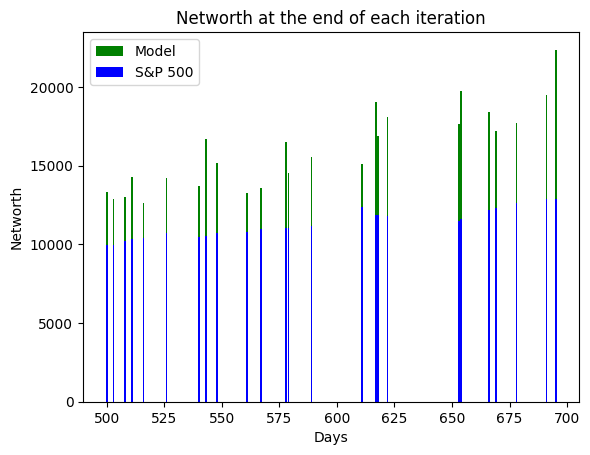

16036.735031509399




Test Parameters for Test 10
{   'Name': 'Test 10',
    'above_beta_mean': False,
    'buy_trigger': 2,
    'lockin_gains_factor': 1000,
    'mean_type': '+ve',
    'prefer_beta': True,
    'security_age': 20,
    'sell_trigger': 1}
Profit Distribution
             beta        days      profit
count  746.000000  746.000000  746.000000
mean     1.154290    5.542895   20.985053
std      0.431837    5.247067   29.169887
min      0.000000    1.000000    0.528097
25%      0.850000    1.000000    6.630154
50%      1.130000    4.000000   12.719517
75%      1.450000    7.000000   25.367422
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  276.000000  276.000000
mean     1.192971  -45.952802
std      0.433541   63.400880
min      0.000000 -355.499992
25%      0.927500  -57.421970
50%      1.195000  -25.016155
75%      1.450000   -7.773566
max      2.880000   23.450012
Total Profit 15654.849820 and Total Loss -12682.973447
Total networth: 12736 (C

Profit Distribution
             beta        days      profit
count  759.000000  759.000000  759.000000
mean     1.161673    5.451910   21.771130
std      0.433324    5.163296   28.892488
min      0.000000    1.000000    0.528097
25%      0.860000    1.000000    7.176895
50%      1.150000    4.000000   13.210373
75%      1.460000    7.000000   26.821690
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  290.000000  290.000000
mean     1.173552  -44.514158
std      0.427868   65.072645
min      0.000000 -477.966690
25%      0.892500  -58.040600
50%      1.160000  -24.011383
75%      1.450000   -7.037430
max      2.880000   25.950012
Total Profit 16524.287786 and Total Loss -12909.105945
Total networth: 13431 (Cash 244) after going back 503 days (2021-04-09 00:00:00-04:00)
Model (34.318317)% vs S&P Performance (-0.575949)%


Profit Distribution
            beta        days      profit
count  749.00000  749.000000  749.000000
mean     1.15761    5.347130   21.007004
std      0.42821    5.113648   28.252456
min      0.00000    1.000000    0.528097
25%      0.86000    1.000000    6.964951
50%      1.15000    4.000000   12.963791
75%      1.45000    7.000000   25.807953
max      2.88000   21.000000  381.750031

Loss Distribution
             beta        loss
count  284.000000  284.000000
mean     1.189261  -45.267461
std      0.431979   63.105922
min      0.000000 -355.499992
25%      0.927500  -59.677057
50%      1.180000  -23.773613
75%      1.450000   -6.846235
max      2.880000   25.950012
Total Profit 15734.246035 and Total Loss -12855.958924
Total networth: 12642 (Cash 239) after going back 508 days (2021-04-01 00:00:00-04:00)
Model (26.428369)% vs S&P Performance (2.118225)%


Profit Distribution
             beta        days      profit
count  789.000000  789.000000  789.000000
mean     1.160025    5.482890   21.067796
std      0.420938    5.209692   28.250948
min      0.000000    1.000000    0.570283
25%      0.860000    1.000000    7.127686
50%      1.140000    4.000000   12.979126
75%      1.450000    7.000000   25.126114
max      2.880000   22.000000  381.750031

Loss Distribution
             beta        loss
count  291.000000  291.000000
mean     1.190515  -46.001015
std      0.441737   64.075317
min      0.000000 -355.499992
25%      0.925000  -59.126244
50%      1.180000  -24.500008
75%      1.450000   -7.702837
max      2.880000   25.950012
Total Profit 16622.491369 and Total Loss -13386.295228
Total networth: 13045 (Cash 262) after going back 511 days (2021-03-29 00:00:00-04:00)
Model (30.458460)% vs S&P Performance (3.372624)%


Profit Distribution
             beta        days      profit
count  787.000000  787.000000  787.000000
mean     1.160775    5.442186   20.540489
std      0.427028    5.104022   27.961597
min      0.000000    1.000000    0.528097
25%      0.860000    1.000000    6.582556
50%      1.140000    4.000000   12.486839
75%      1.450000    7.000000   25.026245
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  287.000000  287.000000
mean     1.185401  -45.981126
std      0.428382   62.136602
min      0.000000 -355.499992
25%      0.925000  -59.088955
50%      1.180000  -25.103264
75%      1.450000   -7.818546
max      2.880000   23.450012
Total Profit 16165.364723 and Total Loss -13196.583295
Total networth: 12733 (Cash 330) after going back 516 days (2021-03-22 00:00:00-04:00)
Model (27.333312)% vs S&P Performance (4.172724)%


Profit Distribution
             beta        days      profit
count  899.000000  899.000000  899.000000
mean     1.157831    5.399333   22.521793
std      0.438418    5.129898   30.053912
min      0.000000    1.000000    0.528097
25%      0.850000    1.000000    6.976080
50%      1.140000    4.000000   13.396912
75%      1.460000    7.000000   26.798058
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  319.000000  319.000000
mean     1.176426  -46.788803
std      0.423780   65.829085
min      0.000000 -410.099945
25%      0.930000  -59.901223
50%      1.160000  -24.500008
75%      1.450000   -7.818546
max      2.880000   23.450012
Total Profit 20247.092342 and Total Loss -14925.628066
Total networth: 15096 (Cash 267) after going back 526 days (2021-03-08 00:00:00-05:00)
Model (50.962641)% vs S&P Performance (7.423291)%


Profit Distribution
             beta        days      profit
count  836.000000  836.000000  836.000000
mean     1.163194    5.455742   21.416043
std      0.420834    5.164058   28.746182
min      0.000000    1.000000    0.528097
25%      0.860000    1.000000    7.058506
50%      1.150000    4.000000   13.013077
75%      1.460000    7.000000   26.215887
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  303.000000  303.000000
mean     1.180858  -47.171511
std      0.424423   64.212819
min      0.000000 -355.499992
25%      0.925000  -60.633144
50%      1.170000  -25.103264
75%      1.450000   -7.818546
max      2.880000   23.450012
Total Profit 17903.812165 and Total Loss -14292.967839
Total networth: 13405 (Cash 366) after going back 540 days (2021-02-16 00:00:00-05:00)
Model (34.056442)% vs S&P Performance (4.384640)%


Profit Distribution
             beta        days      profit
count  964.000000  964.000000  964.000000
mean     1.162925    5.454357   22.951162
std      0.429541    5.079533   30.173546
min      0.000000    1.000000    0.570283
25%      0.860000    1.000000    7.467890
50%      1.145000    4.000000   13.690023
75%      1.460000    7.000000   27.250462
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  327.000000  327.000000
mean     1.173609  -49.272624
std      0.424479   75.133026
min      0.000000 -720.099945
25%      0.925000  -60.512295
50%      1.160000  -26.085052
75%      1.450000   -7.818546
max      2.880000   23.450012
Total Profit 22124.919887 and Total Loss -16112.148066
Total networth: 15752 (Cash 250) after going back 543 days (2021-02-10 00:00:00-05:00)
Model (57.522717)% vs S&P Performance (4.990950)%


Profit Distribution
             beta       days      profit
count  977.000000  977.00000  977.000000
mean     1.159110    5.42477   22.762619
std      0.429623    5.05753   29.783440
min      0.000000    1.00000    0.570283
25%      0.860000    1.00000    7.502213
50%      1.140000    4.00000   13.607635
75%      1.460000    7.00000   27.196426
max      2.880000   21.00000  381.750031

Loss Distribution
             beta        loss
count  329.000000  329.000000
mean     1.171459  -49.318840
std      0.424140   74.855608
min      0.000000 -720.099945
25%      0.900000  -60.500832
50%      1.150000  -26.099701
75%      1.450000   -7.831421
max      2.880000   23.450012
Total Profit 22239.078379 and Total Loss -16225.898380
Total networth: 15752 (Cash 250) after going back 548 days (2021-02-03 00:00:00-05:00)
Model (57.526798)% vs S&P Performance (7.175924)%


Profit Distribution
             beta        days      profit
count  963.000000  963.000000  963.000000
mean     1.164891    5.527518   21.732880
std      0.439791    5.143474   28.691777
min      0.000000    1.000000    0.528097
25%      0.850000    1.000000    6.961784
50%      1.150000    4.000000   12.988968
75%      1.460000    7.000000   26.684246
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  340.000000  340.000000
mean     1.171500  -46.877555
std      0.419162   67.675152
min      0.000000 -499.649963
25%      0.920000  -58.613052
50%      1.170000  -25.376472
75%      1.450000   -7.894592
max      2.880000   23.450012
Total Profit 20928.763680 and Total Loss -15938.368726
Total networth: 14712 (Cash 250) after going back 561 days (2021-01-14 00:00:00-05:00)
Model (47.127448)% vs S&P Performance (8.153780)%


Profit Distribution
             beta        days      profit
count  993.000000  993.000000  993.000000
mean     1.162749    5.422961   22.054434
std      0.434520    5.121739   28.948364
min      0.000000    1.000000    0.528097
25%      0.860000    1.000000    7.231178
50%      1.130000    4.000000   13.607635
75%      1.460000    7.000000   26.753273
max      2.880000   21.000000  381.750031

Loss Distribution
             beta        loss
count  348.000000  348.000000
mean     1.158707  -46.574373
std      0.410289   69.353224
min      0.000000 -499.649963
25%      0.915000  -56.903286
50%      1.150000  -24.535999
75%      1.390000   -6.981010
max      2.880000   23.450012
Total Profit 21900.052681 and Total Loss -16207.881937
Total networth: 15424 (Cash 287) after going back 567 days (2021-01-06 00:00:00-05:00)
Model (54.240706)% vs S&P Performance (9.521526)%


Profit Distribution
              beta         days       profit
count  1026.000000  1026.000000  1026.000000
mean      1.163441     5.375244    21.924116
std       0.428717     4.970403    28.966255
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.975551
50%       1.140000     4.000000    13.275576
75%       1.460000     7.000000    26.739950
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  337.000000  337.000000
mean     1.162404  -50.786813
std      0.427118   78.284275
min      0.000000 -720.099945
25%      0.890000  -60.500832
50%      1.160000  -26.099701
75%      1.420000   -8.061981
max      2.880000   23.450012
Total Profit 22494.142857 and Total Loss -17115.155988
Total networth: 15153 (Cash 324) after going back 578 days (2020-12-18 00:00:00-05:00)
Model (51.537867)% vs S&P Performance (10.665042)%


Profit Distribution
              beta         days       profit
count  1004.000000  1004.000000  1004.000000
mean      1.160209     5.483068    21.784056
std       0.436673     5.141537    28.597994
min       0.000000     1.000000     0.528097
25%       0.850000     1.000000     7.086549
50%       1.130000     4.000000    12.984047
75%       1.460000     7.000000    26.649733
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  358.000000  358.000000
mean     1.156480  -46.689669
std      0.423827   65.971473
min      0.000000 -385.350037
25%      0.890000  -59.245710
50%      1.150000  -24.296322
75%      1.420000   -7.267771
max      2.880000   23.450012
Total Profit 21871.191907 and Total Loss -16714.901452
Total networth: 14883 (Cash 280) after going back 579 days (2020-12-17 00:00:00-05:00)
Model (48.831903)% vs S&P Performance (10.276483)%


Profit Distribution
              beta         days       profit
count  1069.000000  1069.000000  1069.000000
mean      1.163152     5.444341    22.578874
std       0.427863     5.125023    29.212598
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     7.181168
50%       1.140000     4.000000    13.533440
75%       1.460000     7.000000    27.449989
max       2.880000    22.000000   381.750031

Loss Distribution
             beta        loss
count  353.000000  353.000000
mean     1.167847  -48.720535
std      0.427722   76.558558
min      0.000000 -725.333405
25%      0.890000  -58.775444
50%      1.150000  -25.850868
75%      1.450000   -7.050018
max      2.880000   23.450012
Total Profit 24136.816635 and Total Loss -17198.348942
Total networth: 16696 (Cash 246) after going back 589 days (2020-12-03 00:00:00-05:00)
Model (66.967675)% vs S&P Performance (11.953464)%


Profit Distribution
              beta         days       profit
count  1206.000000  1206.000000  1206.000000
mean      1.165108     5.480929    21.838081
std       0.425430     5.128964    28.149396
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.986036
50%       1.150000     4.000000    13.275576
75%       1.460000     7.000000    26.611423
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  395.000000  395.000000
mean     1.139241  -47.078479
std      0.429567   77.241031
min      0.000000 -720.099945
25%      0.850000  -54.881268
50%      1.130000  -24.500008
75%      1.390000   -7.069244
max      2.880000   23.450012
Total Profit 26336.725626 and Total Loss -18595.999198
Total networth: 17462 (Cash 341) after going back 611 days (2020-11-02 00:00:00-05:00)
Model (74.620262)% vs S&P Performance (24.009740)%


Profit Distribution
              beta         days       profit
count  1234.000000  1234.000000  1234.000000
mean      1.169125     5.436791    22.314811
std       0.429785     5.020442    29.081567
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.864405
50%       1.150000     4.000000    13.241291
75%       1.460000     7.000000    26.883993
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  396.000000  396.000000
mean     1.152652  -49.899147
std      0.419895   80.453761
min      0.000000 -720.099945
25%      0.870000  -59.940236
50%      1.150000  -25.750275
75%      1.390000   -8.003035
max      2.880000   23.450012
Total Profit 27536.476536 and Total Loss -19760.062299
Total networth: 17497 (Cash 376) after going back 617 days (2020-10-23 00:00:00-04:00)
Model (74.977140)% vs S&P Performance (18.457667)%


Profit Distribution
              beta         days       profit
count  1218.000000  1218.000000  1218.000000
mean      1.176700     5.480296    22.146616
std       0.429712     5.102405    28.456622
min       0.000000     1.000000     0.528097
25%       0.870000     1.000000     7.127914
50%       1.160000     4.000000    13.302822
75%       1.470000     7.000000    27.025347
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  395.000000  395.000000
mean     1.141468  -50.764878
std      0.427148   81.599637
min      0.000000 -720.099945
25%      0.850000  -60.633144
50%      1.120000  -25.850868
75%      1.390000   -8.000431
max      2.880000   23.450012
Total Profit 26974.578023 and Total Loss -20052.126994
Total networth: 16633 (Cash 321) after going back 618 days (2020-10-22 00:00:00-04:00)
Model (66.330508)% vs S&P Performance (18.865844)%


Profit Distribution
              beta         days       profit
count  1242.000000  1242.000000  1242.000000
mean      1.176997     5.348631    22.629092
std       0.432418     4.974070    29.969853
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.975551
50%       1.160000     4.000000    13.302822
75%       1.470000     7.000000    27.225189
max       2.880000    22.000000   381.750031

Loss Distribution
             beta        loss
count  406.000000  406.000000
mean     1.148793  -50.190617
std      0.422653   85.149911
min      0.000000 -967.466660
25%      0.860000  -58.669062
50%      1.145000  -25.015030
75%      1.412500   -7.872372
max      2.880000   23.450012
Total Profit 28105.332255 and Total Loss -20377.390666
Total networth: 17455 (Cash 335) after going back 622 days (2020-10-16 00:00:00-04:00)
Model (74.553414)% vs S&P Performance (17.831338)%


Profit Distribution
              beta         days       profit
count  1365.000000  1365.000000  1365.000000
mean      1.182286     5.405861    22.541358
std       0.425460     5.025533    29.630845
min       0.000000     1.000000     0.528097
25%       0.870000     1.000000     7.053757
50%       1.180000     4.000000    13.416672
75%       1.470000     7.000000    27.069244
max       2.880000    22.000000   381.750031

Loss Distribution
             beta        loss
count  441.000000  441.000000
mean     1.130045  -48.881197
std      0.420628   78.024083
min      0.000000 -720.099945
25%      0.850000  -59.402466
50%      1.120000  -25.850868
75%      1.360000   -7.805672
max      2.880000   23.450012
Total Profit 30768.953381 and Total Loss -21556.607685
Total networth: 18877 (Cash 385) after going back 653 days (2020-09-02 00:00:00-04:00)
Model (88.775454)% vs S&P Performance (14.638462)%


Profit Distribution
              beta         days       profit
count  1383.000000  1383.000000  1383.000000
mean      1.171077     5.430224    22.302625
std       0.428739     5.096537    29.141526
min       0.000000     1.000000     0.593481
25%       0.860000     1.000000     6.961784
50%       1.150000     4.000000    13.397522
75%       1.470000     7.000000    26.912823
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  438.000000  438.000000
mean     1.126667  -50.189571
std      0.420077   81.414997
min      0.000000 -720.099945
25%      0.835000  -59.690857
50%      1.120000  -25.750275
75%      1.370000   -7.031460
max      2.880000   23.450012
Total Profit 30844.530272 and Total Loss -21983.032055
Total networth: 18546 (Cash 334) after going back 654 days (2020-09-01 00:00:00-04:00)
Model (85.469980)% vs S&P Performance (16.399987)%


Profit Distribution
              beta         days       profit
count  1381.000000  1381.000000  1381.000000
mean      1.175279     5.426503    22.132320
std       0.432087     5.049594    29.049393
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.977139
50%       1.170000     4.000000    13.520393
75%       1.470000     7.000000    26.749954
max       2.880000    22.000000   381.750031

Loss Distribution
             beta        loss
count  436.000000  436.000000
mean     1.136514  -50.329336
std      0.427630   85.442816
min      0.000000 -967.466660
25%      0.850000  -58.456297
50%      1.120000  -26.130104
75%      1.390000   -7.076397
max      2.880000   23.450012
Total Profit 30564.734097 and Total Loss -21943.590484
Total networth: 18312 (Cash 410) after going back 666 days (2020-08-14 00:00:00-04:00)
Model (83.124434)% vs S&P Performance (21.707752)%


Profit Distribution
              beta         days       profit
count  1362.000000  1362.000000  1362.000000
mean      1.178649     5.350954    21.945170
std       0.435357     5.002295    29.273274
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.780090
50%       1.165000     4.000000    13.024502
75%       1.470000     7.000000    26.137486
max       2.880000    22.000000   381.750031

Loss Distribution
             beta        loss
count  442.000000  442.000000
mean     1.136561  -48.580209
std      0.424764   73.356685
min      0.000000 -596.800079
25%      0.850000  -60.518026
50%      1.125000  -25.750275
75%      1.390000   -7.052250
max      2.880000   23.450012
Total Profit 29889.321303 and Total Loss -21472.452273
Total networth: 18104 (Cash 365) after going back 669 days (2020-08-11 00:00:00-04:00)
Model (81.042188)% vs S&P Performance (23.137427)%


Profit Distribution
              beta         days       profit
count  1427.000000  1427.000000  1427.000000
mean      1.180350     5.418360    21.929208
std       0.431838     5.023035    29.399195
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.565685
50%       1.170000     4.000000    12.979126
75%       1.470000     7.000000    26.281796
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  463.000000  463.000000
mean     1.136890  -48.616963
std      0.418428   85.027821
min      0.000000 -967.466660
25%      0.850000  -56.317291
50%      1.120000  -24.571991
75%      1.390000   -7.036705
max      2.880000   23.450012
Total Profit 31292.979560 and Total Loss -22509.653735
Total networth: 18445 (Cash 309) after going back 678 days (2020-07-29 00:00:00-04:00)
Model (84.455756)% vs S&P Performance (25.981147)%


Profit Distribution
              beta         days       profit
count  1456.000000  1456.000000  1456.000000
mean      1.177782     5.379808    22.149659
std       0.435232     5.065954    29.337127
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.931791
50%       1.160000     4.000000    13.047981
75%       1.470000     7.000000    26.623917
max       2.880000    21.000000   381.750031

Loss Distribution
             beta        loss
count  481.000000  481.000000
mean     1.133929  -48.850267
std      0.417057   73.967148
min      0.000000 -596.800079
25%      0.850000  -60.399981
50%      1.130000  -25.850868
75%      1.410000   -7.831421
max      2.880000   23.450012
Total Profit 32249.903998 and Total Loss -23496.978269
Total networth: 18456 (Cash 255) after going back 691 days (2020-07-10 00:00:00-04:00)
Model (84.565755)% vs S&P Performance (28.884409)%


Profit Distribution
              beta         days       profit
count  1473.000000  1473.000000  1473.000000
mean      1.178608     5.418194    21.820769
std       0.435486     5.037117    28.720375
min       0.000000     1.000000     0.528097
25%       0.860000     1.000000     6.916771
50%       1.160000     4.000000    13.044510
75%       1.470000     7.000000    26.199989
max       2.880000    22.000000   381.750031

Loss Distribution
             beta        loss
count  488.000000  488.000000
mean     1.129324  -47.157173
std      0.417085   72.835185
min      0.000000 -596.800079
25%      0.850000  -58.794088
50%      1.130000  -25.015030
75%      1.390000   -7.032642
max      2.880000   23.450012
Total Profit 32141.993308 and Total Loss -23012.700195
Total networth: 18810 (Cash 275) after going back 695 days (2020-07-06 00:00:00-04:00)
Model (88.105428)% vs S&P Performance (29.100048)%


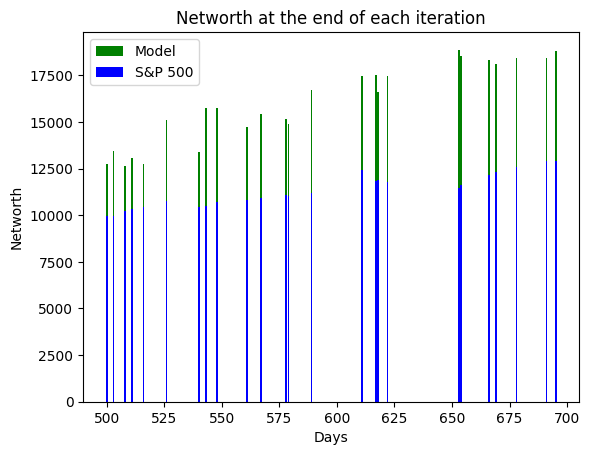

16002.788935089111


In [ ]:

for i in tests_to_run:
  t = tests[i-1]
  buy_trigger = t['buy_trigger']    # times standard deviation
  sell_trigger = t['sell_trigger']   # times the avg cost of the security to grow before we sell
  security_age = t['security_age']  # number of days to hold the security before we cut the losses
  lockin_gains_factor = t['lockin_gains_factor'] # times the orignal amount to grow before we lockin the gains.
  prefer_beta = t['prefer_beta']
  mean_type = t["mean_type"]
  above_beta_mean = t["above_beta_mean"]
  print("Test Parameters for " + t['Name'])
  print("=================================")
  pp.pprint(t)
  run_backtest()
  print()
  print("==================================\n")